In [1]:
import pandas as pd
import numpy as np
import nltk
import string
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.text import Tokenizer
from gensim.models import keyedvectors
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from nltk.stem import WordNetLemmatizer

In [2]:
data = pd.read_csv("yorumlar1.csv")

In [3]:
data = data.drop(['Unnamed: 0'],axis=1)
data

,Puan,Yorum
0,1.0,Hızlı ve özenli kargo bu fiyata gayet iyi bir ...
1,1.0,Harika bir kitqp
2,1.0,Şahane bir plak ! Mermer baskısı o kadar şık o...
3,1.0,İnanılmaz keyifli bir oyun. Hem heyecan hem ke...
4,1.0,Alısverışten çok memnun kaldım eksıksız. Ç sor...
...,...,...
28978,1.0,yer kısıtı olanlar için çok kullanışlı bir ürü...
28979,0.0,içi boş bir kitap her sayfa birbirinden alakas...
28980,1.0,uygun fiyat
28981,1.0,Ürün elime ulaştı. Henüz okumadım ama firma ge...


In [4]:
data.dropna(inplace=True)
data

,Puan,Yorum
0,1.0,Hızlı ve özenli kargo bu fiyata gayet iyi bir ...
1,1.0,Harika bir kitqp
2,1.0,Şahane bir plak ! Mermer baskısı o kadar şık o...
3,1.0,İnanılmaz keyifli bir oyun. Hem heyecan hem ke...
4,1.0,Alısverışten çok memnun kaldım eksıksız. Ç sor...
...,...,...
28978,1.0,yer kısıtı olanlar için çok kullanışlı bir ürü...
28979,0.0,içi boş bir kitap her sayfa birbirinden alakas...
28980,1.0,uygun fiyat
28981,1.0,Ürün elime ulaştı. Henüz okumadım ama firma ge...


In [5]:
sw = set(nltk.corpus.stopwords.words('turkish'))
poin = set(string.punctuation)

In [6]:
def remove_punctuation(text):
    text_nopunct = "".join([x for x in text if x not in poin])
    return text_nopunct

In [7]:
data['Yorum'] = data['Yorum'].apply(lambda x: remove_punctuation(x))
data

,Puan,Yorum
0,1.0,Hızlı ve özenli kargo bu fiyata gayet iyi bir ...
1,1.0,Harika bir kitqp
2,1.0,Şahane bir plak Mermer baskısı o kadar şık o ...
3,1.0,İnanılmaz keyifli bir oyun Hem heyecan hem kel...
4,1.0,Alısverışten çok memnun kaldım eksıksız Ç soru...
...,...,...
28978,1.0,yer kısıtı olanlar için çok kullanışlı bir ürü...
28979,0.0,içi boş bir kitap her sayfa birbirinden alakas...
28980,1.0,uygun fiyat
28981,1.0,Ürün elime ulaştı Henüz okumadım ama firma ger...


In [8]:
def lemmatize(text):
  return WordNetLemmatizer().lemmatize(text, pos='v')

def remove_stopWord(text):
    text = nltk.tokenize.word_tokenize(text)
    list = []
    for word in text:
        if word not in sw:
            list.append(lemmatize(word.lower()))
    return " ".join(list)

In [9]:
processed_docs = data['Yorum'].map(remove_stopWord)
data['Yorum'] = processed_docs
data

,Puan,Yorum
0,1.0,hızlı özenli kargo fiyata gayet iyi bir ürün i...
1,1.0,harika bir kitqp
2,1.0,şahane bir plak mermer baskısı kadar şık kadar...
3,1.0,i̇nanılmaz keyifli bir oyun hem heyecan kelime...
4,1.0,alısverışten memnun kaldım eksıksız ç sorunsuz...
...,...,...
28978,1.0,yer kısıtı olanlar kullanışlı bir ürün ancak d...
28979,0.0,içi boş bir kitap sayfa birbirinden alakasız 2...
28980,1.0,uygun fiyat
28981,1.0,ürün elime ulaştı henüz okumadım firma gerçekt...


In [10]:
data["Yorum"][28982]

'klasik türk filmi türkan şoray'

In [11]:
data = shuffle(data)
data = data.reset_index(drop=True)
data

,Puan,Yorum
0,1.0,oğluma karne hediyesi olarak aldım
1,1.0,güzel ucuz
2,1.0,kitaplar güzel
3,1.0,çok hızlı geldi güzel bi set
4,1.0,ürün piyasaya gore fiyat olarak iyi i̇ç sayfal...
...,...,...
28978,1.0,bugüne kadar okumamış olmam kesinlikle büyük p...
28979,1.0,muhteşem bir kitap kesinle tavsiye ederim fiya...
28980,0.0,japon yapıştırıcısı birlikte sipariş verin öze...
28981,1.0,henüz okumadım güzel olduğunu düşünüyorum teşe...


In [12]:
data["Yorum"][28978]

'bugüne kadar okumamış olmam kesinlikle büyük pişmanlığım i̇lk bir kitap beni hıçkıra hıçkıra ağlattı küçük'

In [13]:
max_words = 10000 # Nitelik olarak düşünülecek kelime sayısı 
embedding_dim = 50 # Embedding vektör büyüklüğü
maxlen = 40 # Metni 40 kelimeden sonra keser 
trunc_type = 'post' 
padding_type = 'post' 
oov_tok = '<OOV>' # Out Of Vocabulary 

In [14]:
tokenizer = Tokenizer(num_words=max_words, oov_token=None)
tokenizer

In [15]:
tokenizer.fit_on_texts(data["Yorum"])

In [16]:
word_index_items = tokenizer.word_index.items()
word_index_items

dict_items([('bir', 1), ('güzel', 2), ('kitap', 3), ('ürün', 4), ('iyi', 5), ('tavsiye', 6), ('ederim', 7), ('hızlı', 8), ('teşekkürler', 9), ('kargo', 10), ('gayet', 11), ('çok', 12), ('geldi', 13), ('kitabı', 14), ('aldım', 15), ('elime', 16), ('kaliteli', 17), ('kadar', 18), ('olarak', 19), ('ulaştı', 20), ('teşekkür', 21), ('harika', 22), ('uygun', 23), ('kesinlikle', 24), ('cok', 25), ('gerçekten', 26), ('göre', 27), ('var', 28), ('bu', 29), ('gün', 30), ('ben', 31), ('2', 32), ('şekilde', 33), ('biraz', 34), ('sonra', 35), ('yok', 36), ('gereken', 37), ('değil', 38), ('ilk', 39), ('bi', 40), ('fiyat', 41), ('sipariş', 42), ('mükemmel', 43), ('ürünü', 44), ('kalitesi', 45), ('3', 46), ('oyun', 47), ('kızım', 48), ('önce', 49), ('oğlum', 50), ('1', 51), ('ediyorum', 52), ('teslimat', 53), ('bence', 54), ('yeni', 55), ('başarılı', 56), ('kitabın', 57), ('hepsiburada', 58), ('günde', 59), ('okudum', 60), ('akıcı', 61), ('oldu', 62), ('tek', 63), ('sorunsuz', 64), ('herkese', 65), ('a

In [17]:
word_index = tokenizer.word_index

In [18]:
from itertools import islice

def take(n,data):
    return islice(data, n)

In [19]:
n_items = take(20000,word_index_items)
n_items

In [22]:
word_index

{'bir': 1,
 'güzel': 2,
 'kitap': 3,
 'ürün': 4,
 'iyi': 5,
 'tavsiye': 6,
 'ederim': 7,
 'hızlı': 8,
 'teşekkürler': 9,
 'kargo': 10,
 'gayet': 11,
 'çok': 12,
 'geldi': 13,
 'kitabı': 14,
 'aldım': 15,
 'elime': 16,
 'kaliteli': 17,
 'kadar': 18,
 'olarak': 19,
 'ulaştı': 20,
 'teşekkür': 21,
 'harika': 22,
 'uygun': 23,
 'kesinlikle': 24,
 'cok': 25,
 'gerçekten': 26,
 'göre': 27,
 'var': 28,
 'bu': 29,
 'gün': 30,
 'ben': 31,
 '2': 32,
 'şekilde': 33,
 'biraz': 34,
 'sonra': 35,
 'yok': 36,
 'gereken': 37,
 'değil': 38,
 'ilk': 39,
 'bi': 40,
 'fiyat': 41,
 'sipariş': 42,
 'mükemmel': 43,
 'ürünü': 44,
 'kalitesi': 45,
 '3': 46,
 'oyun': 47,
 'kızım': 48,
 'önce': 49,
 'oğlum': 50,
 '1': 51,
 'ediyorum': 52,
 'teslimat': 53,
 'bence': 54,
 'yeni': 55,
 'başarılı': 56,
 'kitabın': 57,
 'hepsiburada': 58,
 'günde': 59,
 'okudum': 60,
 'akıcı': 61,
 'oldu': 62,
 'tek': 63,
 'sorunsuz': 64,
 'herkese': 65,
 'ayrıca': 66,
 'fakat': 67,
 'kısa': 68,
 'fiyata': 69,
 'olması': 70,
 'hediye

In [23]:
sequences = tokenizer.texts_to_sequences(data.Yorum) # Metinleri tam sayı listelerine dönüştürür. 
sequences

[[344, 1820, 403, 19, 15],
 [2, 239],
 [84, 2],
 [12, 8, 13, 2, 40, 160],
 [4, 668, 647, 41, 19, 5, 6558, 979, 202, 32, 193, 4, 125, 41, 648],
 [51, 954, 6559, 658, 1099, 25, 23],
 [115, 23, 2, 1524, 100],
 [843, 1384, 88, 106, 433],
 [410, 83, 485, 1473, 304, 54, 4882, 5609, 2, 253, 8020, 12, 2],
 [11, 56],
 [86, 112, 1336, 635, 203, 246, 5, 86],
 [8, 161, 193],
 [649, 85, 1, 3583, 3, 1821],
 [108, 18, 108, 5610, 1001, 503, 2301, 36, 1049, 5610, 100, 6560],
 [505, 3284, 1525, 24, 5611],
 [2,
  1,
  755,
  955,
  1385,
  55,
  42,
  155,
  928,
  256,
  3584,
  929,
  516,
  89,
  1181,
  579,
  224,
  8021],
 [26,
  8022,
  1684,
  756,
  6561,
  1,
  4,
  8023,
  1425,
  897,
  859,
  1100,
  35,
  8024,
  319,
  4367,
  5612,
  8023,
  897,
  859,
  319,
  120,
  5],
 [],
 [57, 2081, 681, 492, 546],
 [24, 5, 111],
 [86, 292, 4883, 980, 1, 192, 860, 1, 126],
 [873, 2168],
 [226, 4884, 120, 3933, 4368],
 [173, 1822, 2, 65, 692, 1742, 1, 3, 38, 29, 2862, 1823, 636],
 [4,
  874,
  83,
 

In [24]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical

In [25]:
dataTamSayi = pad_sequences(sequences, maxlen=maxlen, padding=padding_type, truncating=trunc_type) # Tam sayı listesini 2B tam sayı sensörüne dönüştürür. 
dataTamSayi

array([[ 344, 1820,  403, ...,    0,    0,    0],
       [   2,  239,    0, ...,    0,    0,    0],
       [  84,    2,    0, ...,    0,    0,    0],
       ...,
       [6768, 6550,  252, ...,    0,    0,    0],
       [ 210,  354,    2, ...,    0,    0,    0],
       [ 165, 1400,   10, ...,    0,    0,    0]])

In [26]:
labels = to_categorical(np.asarray(data.Puan)) # Sınıf etiketlerinin vektöre dönüştürülmesi 
labels[4]

array([0., 1.], dtype=float32)

In [27]:
count = 0
for i in range(len(labels)):
    if labels[i][0]==1:
        count+=1
count

1981

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test = train_test_split(dataTamSayi,labels, test_size=0.3, random_state=42)
y_train.shape

(20288, 2)

In [30]:
dataList = data["Yorum"].values.tolist()
dataList

['oğluma karne hediyesi olarak aldım',
 'güzel ucuz',
 'kitaplar güzel',
 'çok hızlı geldi güzel bi set',
 'ürün piyasaya gore fiyat olarak iyi i̇ç sayfalarından yırtık çıktı zannediyorum 2 kalite ürün olduğu fiyat düşük',
 '1 yasindaki bebeklerime aldimi̇lgilerini cekiyor renkleri hikayeleri güzelfiyatida cok uygun',
 'fiyatı uygun güzel çocuğuma severek okutuyorum',
 'i̇lber hocam zaten 5 yıldız',
 '7 yaşındaki oğlumun yorumu öneririm bence deneyin ailemle güzel vakit geçirdim çok güzel',
 'gayet başarılı',
 'süper herkesin okunası gerekli anlatım dili iyi süper',
 'hızlı gönderi kalite',
 'begendim guzel bir hareketli kitap calismasi olmus',
 'okuyun ölünceye kadar durmaksızın okuyun öğrenin öğretin hayatta bundan kıymetli yok okuyarak öğrenin severek anlayın',
 'efsane icerigi muhtesem kesinlikle okumalisiniz',
 'güzel bir ürüne benziyor bakalım yeni sipariş ettim inşallah pişman olmam görüntüsü şık sağlam gözüküyor umarım sesi öyledir',
 'gerçekten verdiğin parayı hak etmeyen bir 

In [31]:
corpus=[]
for cumle in dataList:
    corpus.append(cumle.split())
corpus

[['oğluma', 'karne', 'hediyesi', 'olarak', 'aldım'],
 ['güzel', 'ucuz'],
 ['kitaplar', 'güzel'],
 ['çok', 'hızlı', 'geldi', 'güzel', 'bi', 'set'],
 ['ürün',
  'piyasaya',
  'gore',
  'fiyat',
  'olarak',
  'iyi',
  'i̇ç',
  'sayfalarından',
  'yırtık',
  'çıktı',
  'zannediyorum',
  '2',
  'kalite',
  'ürün',
  'olduğu',
  'fiyat',
  'düşük'],
 ['1',
  'yasindaki',
  'bebeklerime',
  'aldimi̇lgilerini',
  'cekiyor',
  'renkleri',
  'hikayeleri',
  'güzelfiyatida',
  'cok',
  'uygun'],
 ['fiyatı', 'uygun', 'güzel', 'çocuğuma', 'severek', 'okutuyorum'],
 ['i̇lber', 'hocam', 'zaten', '5', 'yıldız'],
 ['7',
  'yaşındaki',
  'oğlumun',
  'yorumu',
  'öneririm',
  'bence',
  'deneyin',
  'ailemle',
  'güzel',
  'vakit',
  'geçirdim',
  'çok',
  'güzel'],
 ['gayet', 'başarılı'],
 ['süper',
  'herkesin',
  'okunası',
  'gerekli',
  'anlatım',
  'dili',
  'iyi',
  'süper'],
 ['hızlı', 'gönderi', 'kalite'],
 ['begendim', 'guzel', 'bir', 'hareketli', 'kitap', 'calismasi', 'olmus'],
 ['okuyun',
  

In [32]:
word2vec=Word2Vec(corpus, window=5,min_count=2,sg=0)

In [33]:
word2vec.wv.most_similar(["kitap"])

[('kitapçok', 0.9159672856330872),
 ('kitaptı', 0.8965499997138977),
 ('eser', 0.8940800428390503),
 ('nefeste', 0.8928614258766174),
 ('çırpıda', 0.8892183899879456),
 ('kerede', 0.8858830332756042),
 ('okunabilecek', 0.8833584189414978),
 ('solukta', 0.8757128119468689),
 ('kitapbir', 0.8755602240562439),
 ('roman', 0.8725389242172241)]

In [34]:
embeddings_matrix = np.zeros((max_words+1, embedding_dim)) #0 lardan oluşan bir 50 sutun 10001 satır olan bir matrix oluştulu(yor
len(embeddings_matrix)

10001

In [35]:
for word, i in word_index.items():
    try:
        embedding_vector = word2vec.wv[word]
        if embedding_vector is not None and i<10001:
            embeddings_matrix[i] = embedding_vector
    except:
        continue

In [36]:
embeddings_matrix
embeddings_matrix.shape

(10001, 50)

In [37]:
from tensorflow.keras.layers.experimental import RandomFourierFeatures
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import SimpleRNN 
from tensorflow.keras.layers import Embedding

In [38]:
model = Sequential()

model.add(Embedding(max_words+1, embedding_dim, weights=[embeddings_matrix], name='embeded'))
model.add(layers.SpatialDropout1D(0.2))
model.add(LSTM(8, return_sequences=True)) # return_sequences=True -> celstate ve hiddle state döndür
model.add(LSTM(16))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(2, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embeded (Embedding)         (None, None, 50)          500050    
                                                                 
 spatial_dropout1d (SpatialD  (None, None, 50)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, None, 8)           1888      
                                                                 
 lstm_1 (LSTM)               (None, 16)                1600      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 2)                 34        
                                                        

In [40]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test),verbose=1)

Epoch 1/10
317/317 [==============================] - 9s 20ms/step - loss: 0.2874 - accuracy: 0.9284 - val_loss: 0.2432 - val_accuracy: 0.9334
Epoch 2/10
317/317 [==============================] - 6s 18ms/step - loss: 0.2193 - accuracy: 0.9356 - val_loss: 0.1595 - val_accuracy: 0.9481
Epoch 3/10
317/317 [==============================] - 6s 19ms/step - loss: 0.1282 - accuracy: 0.9610 - val_loss: 0.1552 - val_accuracy: 0.9457
Epoch 4/10
317/317 [==============================] - 5s 17ms/step - loss: 0.0916 - accuracy: 0.9731 - val_loss: 0.1667 - val_accuracy: 0.9502
Epoch 5/10
317/317 [==============================] - 5s 17ms/step - loss: 0.0711 - accuracy: 0.9808 - val_loss: 0.1720 - val_accuracy: 0.9481
Epoch 6/10
317/317 [==============================] - 6s 19ms/step - loss: 0.0605 - accuracy: 0.9836 - val_loss: 0.2036 - val_accuracy: 0.9481
Epoch 7/10
317/317 [==============================] - 6s 18ms/step - loss: 0.0494 - accuracy: 0.9873 - val_loss: 0.1996 - val_accuracy: 0.9457

In [41]:
veri = pd.DataFrame(model.history.history)
veri.rename(columns={'loss':'Train Loss','val_loss':'Validation Loss','accuracy':'Train Accuracy','val_accuracy':'Validation Accuracy'},inplace=True)
veri

,Train Loss,Train Accuracy,Validation Loss,Validation Accuracy
0,0.287408,0.928431,0.243221,0.933410
1,0.219269,0.935578,0.159529,0.948131
2,0.128235,0.961011,0.155221,0.945716
3,0.091596,0.973137,0.166696,0.950201
4,0.071091,0.980826,0.172003,0.948131
5,0.060487,0.983636,0.203625,0.948131
6,0.049377,0.987283,0.199557,0.945716
7,0.042075,0.989649,0.232988,0.944221
8,0.037570,0.990783,0.268604,0.943416
9,0.034021,0.991571,0.258843,0.944911


Text(0, 0.5, 'Accuracy')

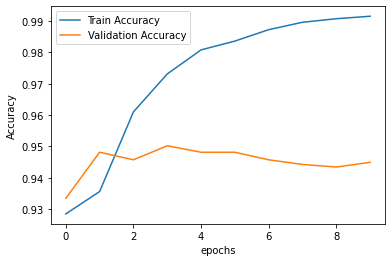

In [42]:
edBasarimi1 = pd.DataFrame(veri["Train Accuracy"])
edBasarimi2 = pd.DataFrame(veri["Validation Accuracy"])
edBasarimi = pd.merge(edBasarimi1,edBasarimi2, right_index=True,left_index=True)
edBasarimi = edBasarimi.plot()
edBasarimi.set_xlabel("epochs")
edBasarimi.set_ylabel("Accuracy")

Text(0, 0.5, 'Loss')

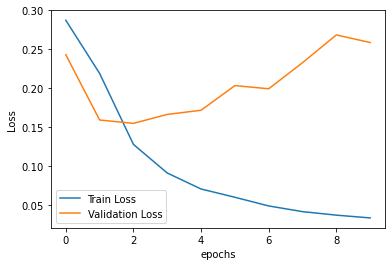

In [43]:
edKaybi1 = pd.DataFrame(veri["Train Loss"])
edKaybi2 = pd.DataFrame(veri["Validation Loss"])
edKaybi = pd.merge(edKaybi1,edKaybi2, right_index=True,left_index=True)
edKaybi = edKaybi.plot()
edKaybi.set_xlabel("epochs")
edKaybi.set_ylabel("Loss")

In [44]:
accuracy, val_accuracy = model.evaluate(X_train,y_train)

634/634 [==============================] - 3s 3ms/step - loss: 0.0253 - accuracy: 0.9939


In [45]:
test_loss, test_acc = model.evaluate(X_test,y_test)

272/272 [==============================] - 1s 3ms/step - loss: 0.2588 - accuracy: 0.9449


In [46]:
from sklearn.metrics import classification_report

In [47]:
y_pred = model.predict(X_test)

In [48]:
y_pred=np.argmax(y_pred, axis=1)
y_test1=np.argmax(y_test, axis=1)

In [49]:
print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.42      0.51       579
           1       0.96      0.98      0.97      8116

    accuracy                           0.94      8695
   macro avg       0.79      0.70      0.74      8695
weighted avg       0.94      0.94      0.94      8695



In [50]:
text1="ürünü beğenmedim"
yazilar=[text1]

In [51]:
sequences1 = tokenizer.texts_to_sequences(yazilar) # Metinleri tam sayı listelerine dönüştürür. 
sequences1

[[44, 546]]

In [52]:
dataTamSayi1 = pad_sequences(sequences1, maxlen=maxlen, padding=padding_type, truncating=trunc_type) # Tam sayı listesini 2B tam sayı sensörüne dönüştürür. 
dataTamSayi1

array([[ 44, 546,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0]])

In [53]:
sonuc = model.predict(dataTamSayi1)

In [54]:
sonuc

array([[0.9854717 , 0.01459703]], dtype=float32)